In [2]:
import pandas as pd

df=pd.read_csv(r'..\data\processed\df_FOODS_3_586.csv')

df.head()

,store_id,sales,date,snap_CA,snap_TX,snap_WI,sell_price,event_name_1,event_type_1,event_name_2,event_type_2,total_price
0,CA_1,42,2011-01-29,0,0,0,1.48,NaN,NaN,NaN,NaN,62.179688
1,CA_2,34,2011-01-29,0,0,0,1.48,NaN,NaN,NaN,NaN,50.335938
2,CA_3,56,2011-01-29,0,0,0,1.48,NaN,NaN,NaN,NaN,82.906250
3,CA_4,6,2011-01-29,0,0,0,1.48,NaN,NaN,NaN,NaN,8.882812
4,TX_1,53,2011-01-29,0,0,0,1.48,NaN,NaN,NaN,NaN,78.464840


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19410 entries, 0 to 19409
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store_id      19410 non-null  object 
 1   sales         19410 non-null  int64  
 2   date          19410 non-null  object 
 3   snap_CA       19410 non-null  int64  
 4   snap_TX       19410 non-null  int64  
 5   snap_WI       19410 non-null  int64  
 6   sell_price    19410 non-null  float64
 7   event_name_1  1580 non-null   object 
 8   event_type_1  1580 non-null   object 
 9   event_name_2  40 non-null     object 
 10  event_type_2  40 non-null     object 
 11  total_price   19410 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 1.8+ MB


In [4]:
df.isnull().sum()

store_id            0
sales               0
date                0
snap_CA             0
snap_TX             0
snap_WI             0
sell_price          0
event_name_1    17830
event_type_1    17830
event_name_2    19370
event_type_2    19370
total_price         0
dtype: int64

In [5]:
df['event_name_1'] = df['event_name_1'].fillna('NONE')
df['event_type_1'] = df['event_type_1'].fillna('NONE')
df['event_name_2'] = df['event_name_2'].fillna('NONE')
df['event_type_2'] = df['event_type_2'].fillna('NONE')

df.isnull().sum()

store_id        0
sales           0
date            0
snap_CA         0
snap_TX         0
snap_WI         0
sell_price      0
event_name_1    0
event_type_1    0
event_name_2    0
event_type_2    0
total_price     0
dtype: int64

In [6]:
df.head()

,store_id,sales,date,snap_CA,snap_TX,snap_WI,sell_price,event_name_1,event_type_1,event_name_2,event_type_2,total_price
0,CA_1,42,2011-01-29,0,0,0,1.48,NONE,NONE,NONE,NONE,62.179688
1,CA_2,34,2011-01-29,0,0,0,1.48,NONE,NONE,NONE,NONE,50.335938
2,CA_3,56,2011-01-29,0,0,0,1.48,NONE,NONE,NONE,NONE,82.906250
3,CA_4,6,2011-01-29,0,0,0,1.48,NONE,NONE,NONE,NONE,8.882812
4,TX_1,53,2011-01-29,0,0,0,1.48,NONE,NONE,NONE,NONE,78.464840


In [ ]:



# Convert 'date' to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Extract time-based features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek
df['dayofyear'] = df['date'].dt.dayofyear
df['weekofyear'] = df['date'].dt.isocalendar().week.astype(int)
df['quarter'] = df['date'].dt.quarter

# Create dummy variables for categorical features
df = pd.get_dummies(df, columns=['store_id', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2'], drop_first=True)

df.head()

,sales,date,snap_CA,snap_TX,snap_WI,sell_price,total_price,year,month,day,...,event_type_1_NONE,event_type_1_National,event_type_1_Religious,event_type_1_Sporting,event_name_2_Easter,event_name_2_Father's day,event_name_2_NONE,event_name_2_OrthodoxEaster,event_type_2_NONE,event_type_2_Religious
0,42,2011-01-29,0,0,0,1.48,62.179688,2011,1,29,...,True,False,False,False,False,False,True,False,True,False
1,34,2011-01-29,0,0,0,1.48,50.335938,2011,1,29,...,True,False,False,False,False,False,True,False,True,False
2,56,2011-01-29,0,0,0,1.48,82.906250,2011,1,29,...,True,False,False,False,False,False,True,False,True,False
3,6,2011-01-29,0,0,0,1.48,8.882812,2011,1,29,...,True,False,False,False,False,False,True,False,True,False
4,53,2011-01-29,0,0,0,1.48,78.464840,2011,1,29,...,True,False,False,False,False,False,True,False,True,False


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define features (X) and target (y)
X = df.drop(['date', 'sales', 'sell_price', 'total_price'], axis=1) # Drop original date, sales, sell_price, and the target variable
y = df['total_price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # Using n_jobs=-1 to utilize all available cores
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

RMSE: 19.28116193057174
R-squared: 0.8654375395305023


In [9]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and train the XGBoost Regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             n_estimators=1000, # Increased number of estimators
                             learning_rate=0.05, # Reduced learning rate
                             max_depth=5,        # Set max depth
                             random_state=42,
                             n_jobs=-1)

xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost RMSE: {rmse_xgb}')
print(f'XGBoost R-squared: {r2_xgb}')

XGBoost RMSE: 18.04489148997686
XGBoost R-squared: 0.8821401008238964


In [10]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and train the LightGBM Regressor model
lgb_model = lgb.LGBMRegressor(objective='regression_l2', # Equivalent to MSE
                              n_estimators=1000,
                              learning_rate=0.05,
                              num_leaves=31, # Default value, can be tuned
                              max_depth=-1,  # No limit on depth
                              random_state=42,
                              n_jobs=-1)

lgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the model
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f'LightGBM RMSE: {rmse_lgb}')
print(f'LightGBM R-squared: {r2_lgb}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 458
[LightGBM] [Info] Number of data points in the train set: 15528, number of used features: 55
[LightGBM] [Info] Start training from score 76.383941
LightGBM RMSE: 17.538324168866612
LightGBM R-squared: 0.8886644902940352


In [11]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluate the best RandomForestRegressor model on the training set
y_pred_rf_train = model.predict(X_train)
rmse_rf_train = np.sqrt(mean_squared_error(y_train, y_pred_rf_train))
r2_rf_train = r2_score(y_train, y_pred_rf_train)

print(f'Tuned RandomForestRegressor RMSE (Training Set): {rmse_rf_train}')
print(f'Tuned RandomForestRegressor R-squared (Training Set): {r2_rf_train}')

Tuned RandomForestRegressor RMSE (Training Set): 6.79520285067306
Tuned RandomForestRegressor R-squared (Training Set): 0.9826837780285665


In [12]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluate the best XGBoost Regressor model on the training set
y_pred_xgb_train = xgb_model.predict(X_train)
rmse_xgb_train = np.sqrt(mean_squared_error(y_train, y_pred_xgb_train))
r2_xgb_train = r2_score(y_train, y_pred_xgb_train)

print(f'Tuned XGBoost Regressor RMSE (Training Set): {rmse_xgb_train}')
print(f'Tuned XGBoost Regressor R-squared (Training Set): {r2_xgb_train}')

Tuned XGBoost Regressor RMSE (Training Set): 14.408923784919427
Tuned XGBoost Regressor R-squared (Training Set): 0.9221405411362679


In [13]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluate the best LightGBM Regressor model on the training set (using the model from RandomizedSearchCV)
y_pred_lgb_train = lgb_model.predict(X_train)
rmse_lgb_train = np.sqrt(mean_squared_error(y_train, y_pred_lgb_train))
r2_lgb_train = r2_score(y_train, y_pred_lgb_train)

print(f'Tuned LightGBM Regressor RMSE (Training Set): {rmse_lgb_train}')
print(f'Tuned LightGBM Regressor R-squared (Training Set): {r2_lgb_train}')

Tuned LightGBM Regressor RMSE (Training Set): 12.877303207613314
Tuned LightGBM Regressor R-squared (Training Set): 0.9378132105386221


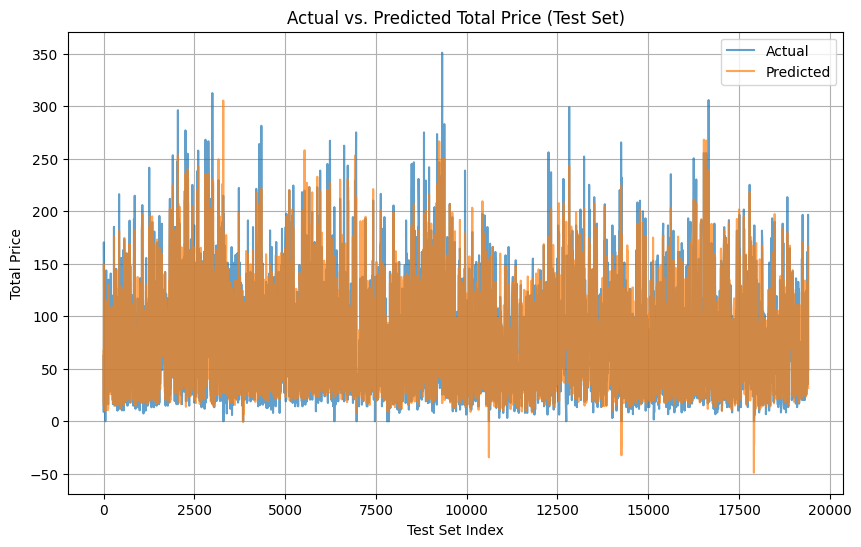

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for actual and predicted values
# Use the index of the test set to align actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lgb})

# Sort by index for a more meaningful line plot
results_df = results_df.sort_index()

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(results_df.index, results_df['Actual'], label='Actual', alpha=0.7)
plt.plot(results_df.index, results_df['Predicted'], label='Predicted', alpha=0.7)
plt.title('Actual vs. Predicted Total Price (Test Set)')
plt.xlabel('Test Set Index')
plt.ylabel('Total Price')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
import joblib

# Define the filename for the saved model
filename = 'best_lightgbm_model.pkl'

# Save the trained LightGBM model to the file
joblib.dump(lgb_model, filename)

print(f"LightGBM model saved to {filename}")

LightGBM model saved to best_lightgbm_model.pkl


In [20]:
# Save dummy column names used during training
joblib.dump(X.columns.tolist(), 'model_features.pkl')

['model_features.pkl']

In [19]:
# Extract known values from one-hot encoded column names
dummy_cols = df.columns.tolist()

# Extract store_id names from dummy columns
known_stores = [col.replace("store_id_", "") for col in dummy_cols if col.startswith("store_id_")]
known_event_name_1 = [col.replace("event_name_1_", "") for col in dummy_cols if col.startswith("event_name_1_")]
known_event_type_1 = [col.replace("event_type_1_", "") for col in dummy_cols if col.startswith("event_type_1_")]
known_event_name_2 = [col.replace("event_name_2_", "") for col in dummy_cols if col.startswith("event_name_2_")]
known_event_type_2 = [col.replace("event_type_2_", "") for col in dummy_cols if col.startswith("event_type_2_")]

# Save all for inference
import joblib
joblib.dump({
    'store_id': known_stores,
    'event_name_1': known_event_name_1,
    'event_type_1': known_event_type_1,
    'event_name_2': known_event_name_2,
    'event_type_2': known_event_type_2,
}, 'known_categories.pkl')


['known_categories.pkl']